# Table of content
- [Stringtie](#Stringtie)
- [Ballgown Defferential Expression Analysis](#Ballgown-Defferential-Expression-Analysis)
- [ERCC DE Analysis](#ERCC-DE-Analysis)

# Stringtie

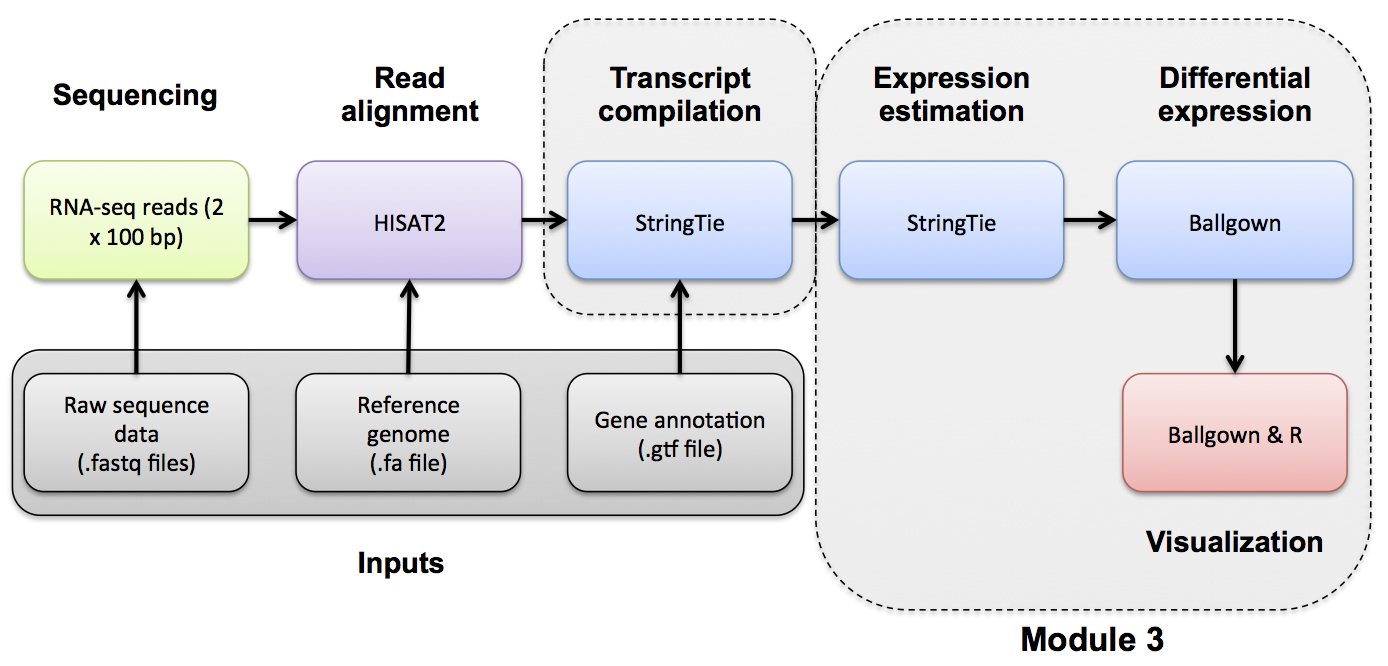

In this module, we will run Stringtie in ‘reference only’ mode. For simplicity and to reduce run time, it is sometimes useful to perform expression analysis with only known transcript models. 

However, Stringtie can predict the transcripts present in each library instead (by dropping the ‘-G’ option in stringtie commands as described in the next module). Stringtie will then assign arbitrary transcript IDs to each transcript assembled from the data and estimate expression for those transcripts. One complication with this method is that in each library a different set of transcripts is likely to be predicted for each library. There may be a lot of similarities but the number of transcripts and their exact structure will differ in the output files for each library. Before you can compare across libraries you therefore need to determine which transcripts correspond to each other across the libraries.

- **–rf** tells StringTie that our data is stranded and to use the correct strand specific mode (i.e. assume a stranded library fr-firststrand).
- **-p 4** tells StringTie to use 4 CPUs
- **-G** reference annotation to use for guiding the assembly process (GTF/GFF3)
- **-e** only estimate the abundance of given reference transcripts (requires -G)
- **-B** enable output of Ballgown table files which will be created in the same directory as the output GTF (requires -G, -o recommended)
- **-o** output path/file name for the assembled transcripts GTF (default: stdout)
- **-A** output path/file name for gene abundance estimates

In [ ]:
cd $RNA_HOME/
mkdir -p expression/stringtie/ref_only/
cd expression/stringtie/ref_only/

stringtie --rf -p 4 -G $RNA_REF_GTF -e -B -o HBR_Rep1/transcripts.gtf -A HBR_Rep1/gene_abundances.tsv $RNA_ALIGN_DIR/HBR_Rep1.bam
stringtie --rf -p 4 -G $RNA_REF_GTF -e -B -o HBR_Rep2/transcripts.gtf -A HBR_Rep2/gene_abundances.tsv $RNA_ALIGN_DIR/HBR_Rep2.bam
stringtie --rf -p 4 -G $RNA_REF_GTF -e -B -o HBR_Rep3/transcripts.gtf -A HBR_Rep3/gene_abundances.tsv $RNA_ALIGN_DIR/HBR_Rep3.bam

stringtie --rf -p 4 -G $RNA_REF_GTF -e -B -o UHR_Rep1/transcripts.gtf -A UHR_Rep1/gene_abundances.tsv $RNA_ALIGN_DIR/UHR_Rep1.bam
stringtie --rf -p 4 -G $RNA_REF_GTF -e -B -o UHR_Rep2/transcripts.gtf -A UHR_Rep2/gene_abundances.tsv $RNA_ALIGN_DIR/UHR_Rep2.bam
stringtie --rf -p 4 -G $RNA_REF_GTF -e -B -o UHR_Rep3/transcripts.gtf -A UHR_Rep3/gene_abundances.tsv $RNA_ALIGN_DIR/UHR_Rep3.bam

### Cleaner bash loop

In [1]:
cd $RNA_HOME/
mkdir -p expression/stringtie/ref_only/
cd expression/stringtie/ref_only/

for sample in UHR_Rep1 UHR_Rep2 UHR_Rep3 HBR_Rep1 HBR_Rep2 HBR_Rep3
do
  stringtie --rf -p 4 -G $RNA_REF_GTF -e -B \
    -o "${sample}/transcripts.gtf" \
    -A "${sample}/gene_abundances.tsv" \
    "$RNA_ALIGN_DIR/${sample}.bam"
done

### What does the raw output from Stringtie look like? For details on the Stringtie output files refer to Stringtie manual (outputs section)

In [2]:
head UHR_Rep1/transcripts.gtf

# stringtie --rf -p 4 -G /home/ubuntu/workspace/rnaseq/refs/chr22_with_ERCC92.gtf -e -B -o UHR_Rep1/transcripts.gtf -A UHR_Rep1/gene_abundances.tsv /home/ubuntu/workspace/rnaseq/alignments/hisat2/UHR_Rep1.bam
# StringTie version 2.2.1
22	havana	transcript	15622601	15632051	.	-	.	gene_id "ENSG00000224435"; transcript_id "ENST00000426025"; ref_gene_name "NF1P6"; cov "0.0"; FPKM "0.000000"; TPM "0.000000";
22	havana	exon	15622601	15622712	.	-	.	gene_id "ENSG00000224435"; transcript_id "ENST00000426025"; exon_number "1"; ref_gene_name "NF1P6"; cov "0.0";
22	havana	exon	15623987	15624071	.	-	.	gene_id "ENSG00000224435"; transcript_id "ENST00000426025"; exon_number "2"; ref_gene_name "NF1P6"; cov "0.0";
22	havana	exon	15624539	15624674	.	-	.	gene_id "ENSG00000224435"; transcript_id "ENST00000426025"; exon_number "3"; ref_gene_name "NF1P6"; cov "0.0";
22	havana	exon	15624956	15625094	.	-	.	gene_id "ENSG00000224435"; transcript_id "ENST00000426025"; exon_number "4"; ref_gene_name "NF1P6"; cov 

In [ ]:
# Or:
less -S UHR_Rep1/transcripts.gtf

### View transcript records only (exclude exon) and improve formatting

In [3]:
grep -v "^#" UHR_Rep1/transcripts.gtf | grep -w "transcript" | head -n 3

22	havana	transcript	15622601	15632051	.	-	.	gene_id "ENSG00000224435"; transcript_id "ENST00000426025"; ref_gene_name "NF1P6"; cov "0.0"; FPKM "0.000000"; TPM "0.000000";
22	havana	transcript	15746630	15778297	.	+	.	gene_id "ENSG00000225255"; transcript_id "ENST00000453395"; ref_gene_name "LINC01297"; cov "0.0"; FPKM "0.000000"; TPM "0.000000";
22	havana	transcript	15749156	15750825	.	-	.	gene_id "ENSG00000235992"; transcript_id "ENST00000423297"; ref_gene_name "GRAMD4P2"; cov "0.0"; FPKM "0.000000"; TPM "0.000000";


In [ ]:
# Or:
grep -v "^#" UHR_Rep1/transcripts.gtf | grep -w "transcript" | column -t | less -S

### Limit the view to transcript records, their start position (tab 4) and their expression values: FPKM and TPM values (tab 9)

In [4]:
awk '{if ($3=="transcript") print}' UHR_Rep1/transcripts.gtf | cut -f 1,4,9 | head -n 3

22	15622601	gene_id "ENSG00000224435"; transcript_id "ENST00000426025"; ref_gene_name "NF1P6"; cov "0.0"; FPKM "0.000000"; TPM "0.000000";
22	15746630	gene_id "ENSG00000225255"; transcript_id "ENST00000453395"; ref_gene_name "LINC01297"; cov "0.0"; FPKM "0.000000"; TPM "0.000000";
22	15749156	gene_id "ENSG00000235992"; transcript_id "ENST00000423297"; ref_gene_name "GRAMD4P2"; cov "0.0"; FPKM "0.000000"; TPM "0.000000";


In [ ]:
# Or: 
awk '{if ($3=="transcript") print}' UHR_Rep1/transcripts.gtf | cut -f 1,4,9 | less -S

### Gene and transcript level expression values can also be viewed in these two files:

In [ ]:
less -S -x20 UHR_Rep1/gene_abundances.tsv
column -t UHR_Rep1/t_data.ctab | less -S

### Create a tidy expression matrix files for the StringTie results. This will be done at both the gene and transcript level and also will take into account the various expression measures produced: coverage, FPKM, and TPM.

In [5]:
cd $RNA_HOME/expression/stringtie/ref_only/
wget https://raw.githubusercontent.com/griffithlab/rnabio.org/master/assets/scripts/stringtie_expression_matrix.pl
chmod +x stringtie_expression_matrix.pl

./stringtie_expression_matrix.pl --expression_metric=TPM --result_dirs='HBR_Rep1,HBR_Rep2,HBR_Rep3,UHR_Rep1,UHR_Rep2,UHR_Rep3' --transcript_matrix_file=transcript_tpm_all_samples.tsv --gene_matrix_file=gene_tpm_all_samples.tsv

./stringtie_expression_matrix.pl --expression_metric=FPKM --result_dirs='HBR_Rep1,HBR_Rep2,HBR_Rep3,UHR_Rep1,UHR_Rep2,UHR_Rep3' --transcript_matrix_file=transcript_fpkm_all_samples.tsv --gene_matrix_file=gene_fpkm_all_samples.tsv

./stringtie_expression_matrix.pl --expression_metric=Coverage --result_dirs='HBR_Rep1,HBR_Rep2,HBR_Rep3,UHR_Rep1,UHR_Rep2,UHR_Rep3' --transcript_matrix_file=transcript_coverage_all_samples.tsv --gene_matrix_file=gene_coverage_all_samples.tsv

column -t transcript_tpm_all_samples.tsv | head -n 3
column -t gene_tpm_all_samples.tsv | head -n 3

# Or:
# column -t transcript_tpm_all_samples.tsv | less -S
# column -t gene_tpm_all_samples.tsv | less -S

--2025-05-11 13:19:04--  https://raw.githubusercontent.com/griffithlab/rnabio.org/master/assets/scripts/stringtie_expression_matrix.pl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6704 (6.5K) [text/plain]
Saving to: ‘stringtie_expression_matrix.pl’

stringtie_expressio 100%[===================>]   6.55K  --.-KB/s    in 0s      

2025-05-11 13:19:04 (36.7 MB/s) - ‘stringtie_expression_matrix.pl’ saved [6704/6704]



Processing data for the following 6 samples:
HBR_Rep1 HBR_Rep2 HBR_Rep3 UHR_Rep1 UHR_Rep2 UHR_Rep3

Gathered TPM expression values for 4564 unique transcripts

Gathered TPM expression values for 1410 unique genes

Printed transcript TPM expression matrix to transcript_tpm_all_samples.tsv

Printed gene TPM expression matrix to gene_tpm_all_sampl

#### Let's also look at fpkm and coverage tsv

In [6]:
column -t transcript_fpkm_all_samples.tsv | head -n 3
column -t gene_fpkm_all_samples.tsv | head -n 3

column -t transcript_coverage_all_samples.tsv | head -n 3
column -t gene_coverage_all_samples.tsv | head -n 3

Transcript_ID    HBR_Rep1       HBR_Rep2       HBR_Rep3       UHR_Rep1       UHR_Rep2       UHR_Rep3
ENST00000006251  0.000000       0.000000       0.000000       0.000000       0.000000       0.000000
ENST00000008876  312.759033     362.392609     343.066925     1.370801       9.131575       3.503778
Gene_ID          HBR_Rep1       HBR_Rep2       HBR_Rep3       UHR_Rep1       UHR_Rep2       UHR_Rep3
ENSG00000008735  782.776245     840.442261     848.660828     16.089846      27.629093      9.901917
ENSG00000015475  139.578812     116.290489     177.572189     236.443314     193.805878     246.456924
Transcript_ID    HBR_Rep1     HBR_Rep2     HBR_Rep3     UHR_Rep1     UHR_Rep2     UHR_Rep3
ENST00000006251  0.0          0.0          0.0          0.0          0.0          0.0
ENST00000008876  6.084153     8.666384     7.300539     0.052578     0.231824     0.110026
Gene_ID          HBR_Rep1     HBR_Rep2     HBR_Rep3     UHR_Rep1     UHR_Rep2     UHR_Rep3
ENSG00000008735  11.008389    14.

#### Later we will use these files to perform various comparisons of expression estimation tools (e.g. stringtie, kallisto, htseq-count) and metrics (e.g. FPKM vs TPM).

# Ballgown Defferential Expression Analysis

Perform UHR vs. HBR comparison, using all replicates, for known (reference only mode) transcripts:

In [1]:
mkdir -p $RNA_HOME/de/ballgown/ref_only/
cd $RNA_HOME/de/ballgown/ref_only/

**Initiate R and run these R code below:**

To understand what each of the ballgown functions (eg, texpr) does, [view the manual](https://www.bioconductor.org/packages/release/bioc/manuals/ballgown/man/ballgown.pdf)

In [ ]:
# initiate R
R

# load the required libraries
library(ballgown)
library(genefilter)
library(dplyr)
library(devtools)

# Create phenotype data needed for ballgown analysis
ids = c("UHR_Rep1", "UHR_Rep2", "UHR_Rep3", "HBR_Rep1", "HBR_Rep2", "HBR_Rep3")
type = c("UHR", "UHR", "UHR", "HBR", "HBR", "HBR")
inputs = "/home/ubuntu/workspace/rnaseq/expression/stringtie/ref_only/"
path = paste(inputs, ids, sep="")
pheno_data = data.frame(ids, type, path)

# Creates a ballgown object named bg for RNA-seq transcript assembly analysis using the Ballgown R package.
bg = ballgown(samples = as.vector(pheno_data$path), pData = pheno_data)

# Display a description of this object
bg #output: ballgown instance with 4564 transcripts and 6 samples

# Load all attributes including gene name
bg_table = texpr(bg, 'all') #  extract "all" transcript-level expression measurements (voverage, FPKM) and metadata (transcript ID, gene ID, gene name, etc.) from ballgown objects
bg_gene_names = unique(bg_table[, 9:10])
bg_transcript_names = unique(bg_table[, c(1, 6)])

# Save the ballgown object to a file for later use
save(bg, file = 'bg.rda') # in fresh R session: load("bg.rda")

# Pull the gene and transcript expression data frame from the ballgown object
gene_expression = as.data.frame(gexpr(bg))
transcript_expression = as.data.frame(texpr(bg))

# Perform differential expression (DE) analysis with no filtering, at both gene and transcript level
# Then add on transcript/gene names and sample level fpkm values for export
results_transcripts = stattest(bg, feature = "transcript", covariate = "type", getFC = TRUE, meas = "FPKM") #type = c("UHR", "UHR", "UHR", "HBR", "HBR", "HBR")
results_transcripts = merge(results_transcripts, bg_transcript_names, by.x = c("id"), by.y = c("t_id"))
results_transcripts = merge(results_transcripts, transcript_expression, by.x = c("id"), by.y = c("row.names"))

results_genes = stattest(bg, feature = "gene", covariate = "type", getFC = TRUE, meas = "FPKM")
results_genes = merge(results_genes, bg_gene_names, by.x = c("id"), by.y = c("gene_id"))
results_genes = merge(results_genes, gene_expression, by.x = c("id"), by.y = c("row.names"))

# Save a tab delimited file for both the transcript and gene results
write.table(results_transcripts, "UHR_vs_HBR_transcript_results.tsv", sep = "\t", quote = FALSE, row.names = FALSE)
write.table(results_genes, "UHR_vs_HBR_gene_results.tsv", sep = "\t", quote = FALSE, row.names = FALSE)
# to load: results_genes <- read.table("UHR_vs_HBR_gene_results.tsv", header = TRUE, sep = "\t", stringsAsFactors = FALSE)

# Filter low-abundance genes. Here we remove all transcripts with a variance across the samples of less than one
bg_filt = subset (bg, "rowVars(texpr(bg)) > 1", genomesubset = TRUE)

# Load all attributes including gene name
bg_filt_table = texpr(bg_filt , 'all')
bg_filt_gene_names = unique(bg_filt_table[, 9:10])
bg_filt_transcript_names = unique(bg_filt_table[, c(1,6)])

# Perform DE analysis now using the filtered data
results_transcripts = stattest(bg_filt, feature = "transcript", covariate = "type", getFC = TRUE, meas = "FPKM")
results_transcripts = merge(results_transcripts, bg_filt_transcript_names, by.x = c("id"), by.y = c("t_id"))
results_transcripts = merge(results_transcripts, transcript_expression, by.x = c("id"), by.y = c("row.names"))

results_genes = stattest(bg_filt, feature = "gene", covariate = "type", getFC = TRUE, meas = "FPKM")
results_genes = merge(results_genes, bg_filt_gene_names, by.x = c("id"), by.y = c("gene_id"))
results_genes = merge(results_genes, gene_expression, by.x = c("id"), by.y = c("row.names"))

# Output the filtered list of genes and transcripts and save to tab delimited files
write.table(results_transcripts, "UHR_vs_HBR_transcript_results_filtered.tsv", sep = "\t", quote = FALSE, row.names = FALSE)
write.table(results_genes, "UHR_vs_HBR_gene_results_filtered.tsv", sep = "\t", quote = FALSE, row.names = FALSE)

# Identify the significant genes with p-value < 0.05
sig_transcripts = subset(results_transcripts, results_transcripts$pval<0.05)
sig_genes = subset(results_genes, results_genes$pval<0.05)

# Output the significant gene results to a pair of tab delimited files
write.table(sig_transcripts, "UHR_vs_HBR_transcript_results_sig.tsv", sep = "\t", quote = FALSE, row.names = FALSE)
write.table(sig_genes, "UHR_vs_HBR_gene_results_sig.tsv", sep = "\t", quote = FALSE, row.names = FALSE)

# Exit the R session
quit(save = "no")

### Examine some of the output for the above code:

1. The pheno_data data frame will have 3 columns: ids, type, and path. Let's view the first 6 lines of this dataframe

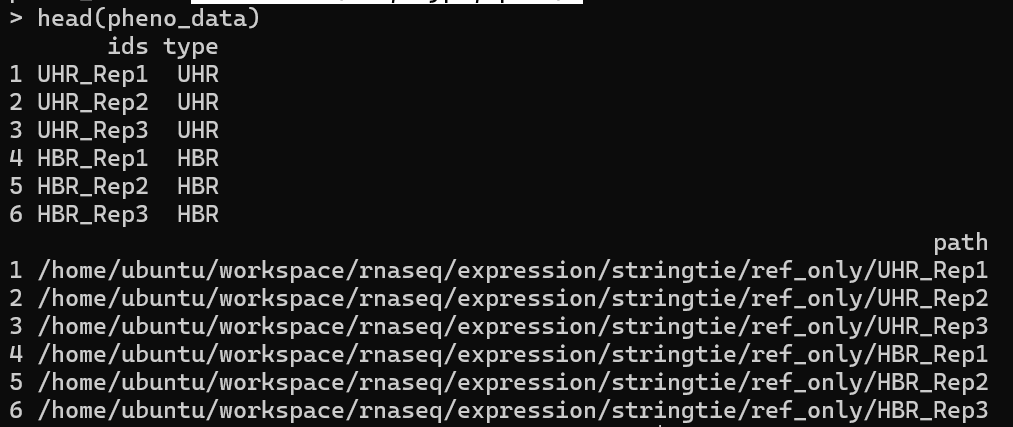

2. View the structure of bg_table

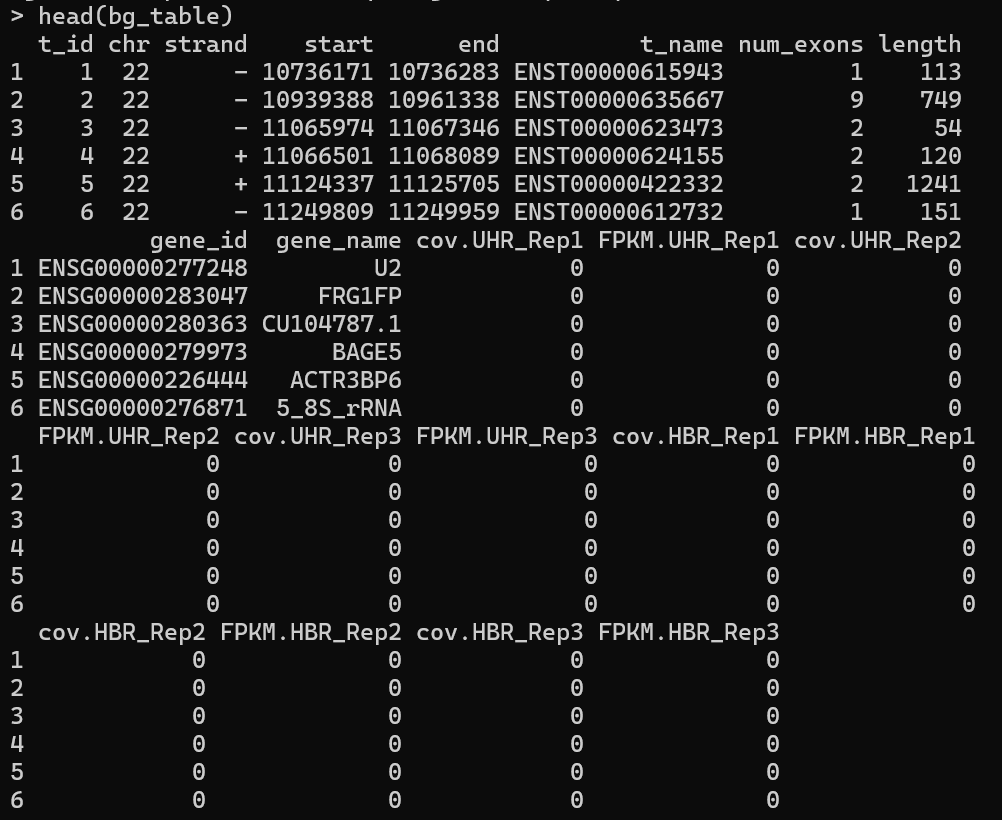

3. Extract columns 9 and 10 of bg_table to count unique gene names. Extract columns 1 and 6 of bg_table to count unique transcript.

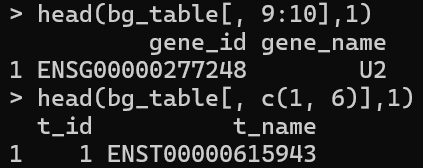

4. How does unique() works for 2 column

bg_table is a data frame with usually one row per transcript. unique() removes duplicate rows from that 2-column subset. So if multiple transcripts map to the same gene_id / gene_name, unique() keeps only one copy of each distinct pair

5. Save R objects as rda or rds

| Feature               | `.rda` / `.RData`                 | `.rds`                        |
| --------------------- | --------------------------------- | ----------------------------- |
| Number of objects     | Multiple                          | One                           |
| Saving function       | `save()`                          | `saveRDS()`                   |
| Loading function      | `load()`                          | `readRDS()`                   |
| Preserves object name | Yes (restores original names)     | No (you assign the name)      |
| Good for              | Session backups, multiple objects | Portable single-object saving |

6. View gene_expression (you can also view transcript_expression data)

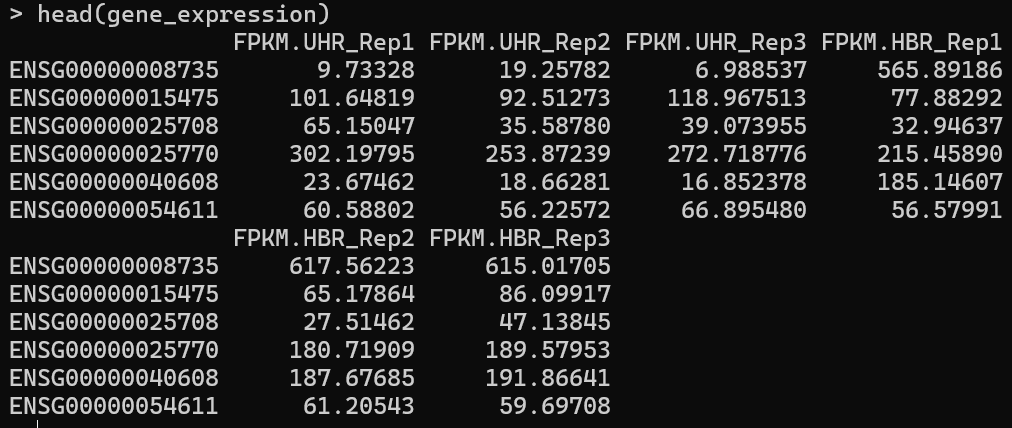

7. covariate = "type" tells Ballgown which column in your phenotype data (pheno_data) to use to define the two groups you're comparing. \
In our case, that column is: type = c("UHR", "UHR", "UHR", "HBR", "HBR", "HBR") \
So we're comparing UHR vs HBR.

8. After stattest(...), the resulting data frame results_genes has a column named id.
This id corresponds to the gene_id/t_id used internally by Ballgown. 
- For gene-level tests (feature = "gene"), this id matches the gene_id column (e.g. ENSG00000008735) in your bg_table.
- For feature = "transcript", id matches t_id in bg_table

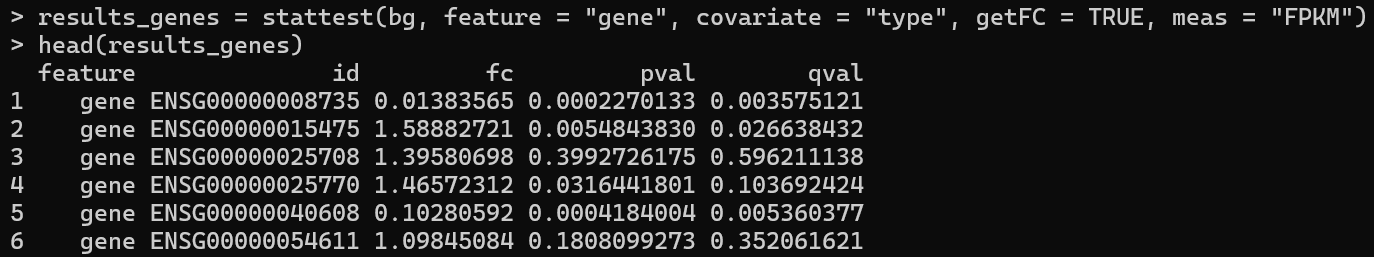

#### For gene (and transcript respectively)
9. The 1st merge command merges results_genes after stattest(...) with g_gene_names 
 
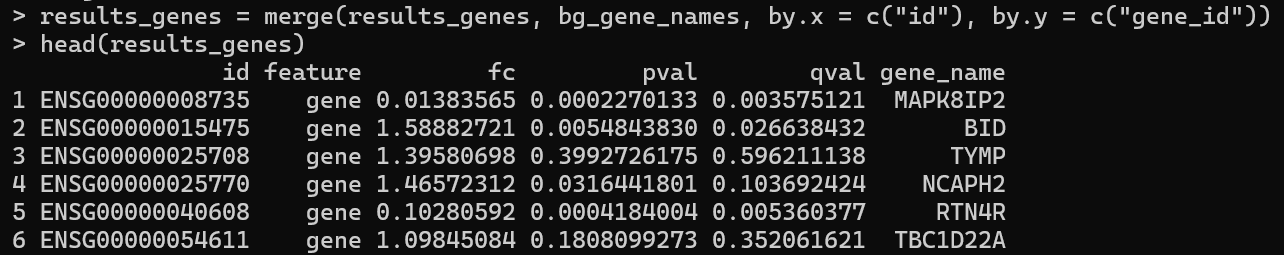

10. In 2nd merge command, row.names of gene_expression are the gene IDs (i.e. ENSG00000...). So we’re telling merge() to match: id from results_genes to the row names of gene_expression.

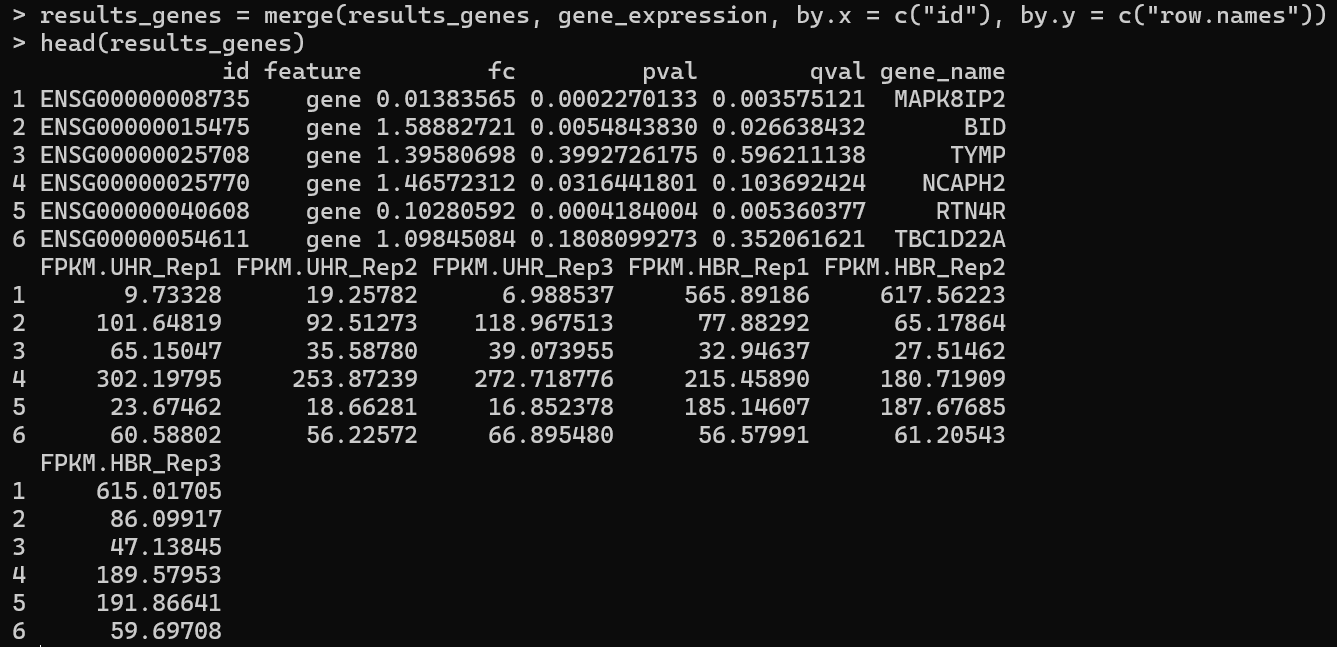

11. rowVars() is a function from the matrixStats package in R. It calculates the FPKM variance across rows (aka samples: UHR_Rep1, UHR_Rep2, UHR_Rep3, HBR_Rep1, etc.) in a numeric matrix.
    - texpr(bg) returns a matrix of transcript expression (usually FPKM values) from the Ballgown object bg.

Note that this rowVars() does not distinguish between sample groups like UHR and HBR — it treats all samples equally. 🤔 Shouldn’t it differentiate between UHR and HBR?
It depends on your goal:
- If you're doing general filtering for variability (e.g., removing transcripts that are invariant across all samples), then using all samples is fine.
- But if you're interested in group-specific variance (e.g., variability within UHR or HBR only), then you’d want to subset the matrix before calling rowVars().

- Get column names for each group \
uhr_cols <- grep("UHR", colnames(texpr(bg))) \
hbr_cols <- grep("HBR", colnames(texpr(bg)))

- Compute group-specific variances \
var_uhr <- rowVars(texpr(bg)[, uhr_cols]) \
var_hbr <- rowVars(texpr(bg)[, hbr_cols])

- Filter out low-variance genes \
uhr_filt = subset (bg, "var_uhr > 1", genomesubset = TRUE)
uhr_filt_table = texpr(uhr_filt , 'all')

hbr_filt = subset (bg, "var_hbr > 1", genomesubset = TRUE)
hbr_filt_table = texpr(hbr_filt , 'all')

**subset (bg, "rowVars(texpr(bg)) > 1", ...)** is a way to filter out low-variance (non-differential) transcripts, under the assumption that interesting genes show some variability across conditions.

12. Where is this variance stored?
It’s not stored directly in the Ballgown object — it’s computed on-the-fly when you run: rowVars(texpr(bg))

If you want to keep it, you could do: \
fpkm_matrix = texpr(bg) \
variances = rowVars(fpkm_matrix)

13. Inspect how rows are filtered:

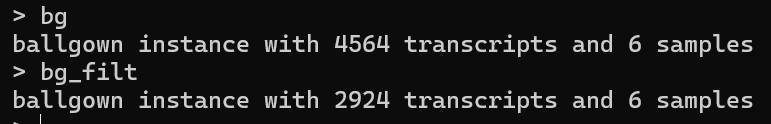

14. Why are some FPKMs still 0 in the filtered table?
It’s possible for a transcript to have zero FPKM in some samples, but still have enough variance across others to exceed the threshold. For example:
- A transcript like ENST00000441221 (first line) that is 0 in 5/6 samples, but highly expressed in FPKM.UHR_Rep2 might still pass the filter.

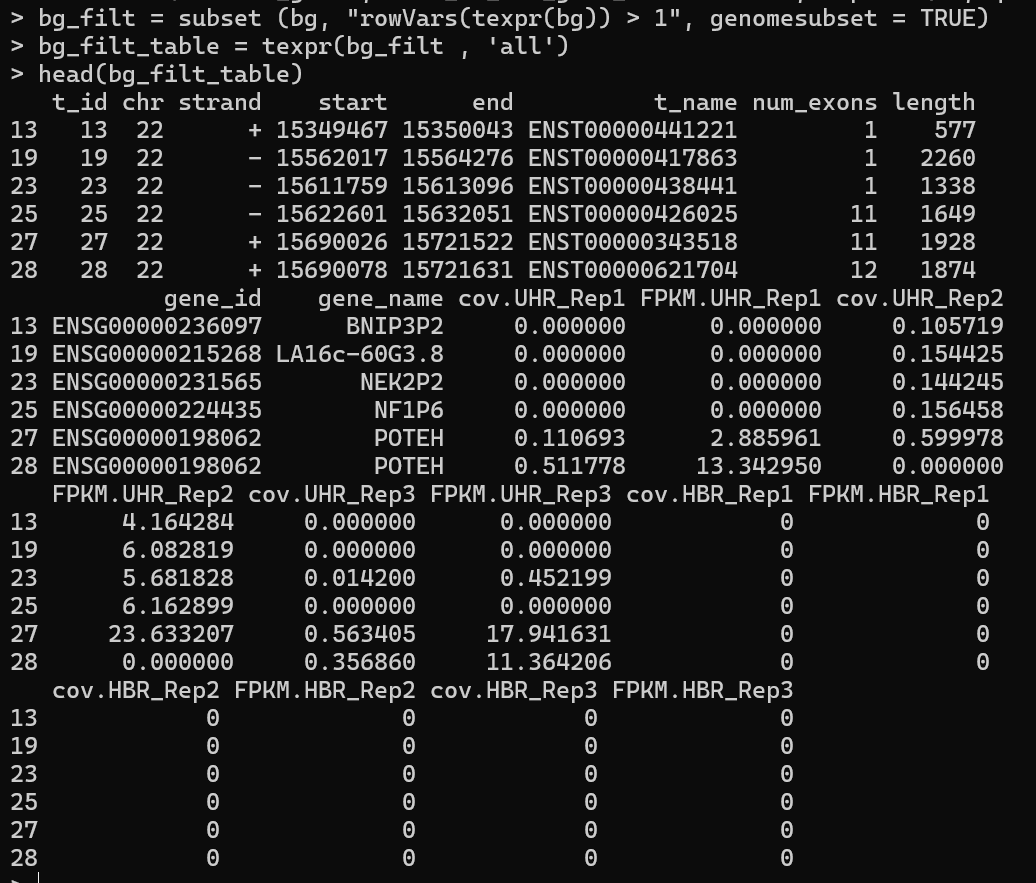



#### In Ballgown, the log2 fold change (fc) is computed as:
Second level alphabetically minus first level of the covariate factor. So the FC is UHR - HBR by default.

**So in our case:** \
type = c("UHR", "UHR", "UHR", "HBR", "HBR", "HBR") 

**R will sort factor levels alphabetically, so:** \
levels(as.factor(type)) \
[1] "HBR" "UHR" 

**Therefore, the formula used by stattest() is:** \
log2(FC) = log2(mean(FPKM_UHR)) - log2(mean(FPKM_HBR)) 

So, a positive fold change means upregulated in UHR vs. HBR \
and a negative fold change means downregulated in UHR vs. HBR.

🧠 **Other way to confirm the order:** 

In [ ]:
levels(bg@pheno$type)
# or:
levels(as.factor(pheno_data$type))

In [2]:
head UHR_vs_HBR_gene_results.tsv

id	feature	fc	pval	qval	gene_name	FPKM.UHR_Rep1	FPKM.UHR_Rep2	FPKM.UHR_Rep3	FPKM.HBR_Rep1	FPKM.HBR_Rep2	FPKM.HBR_Rep3
ENSG00000008735	gene	0.0138356516048798	0.000227013323425229	0.00357512133442728	MAPK8IP2	9.73328025402474	19.2578222030164	6.98853659684799	565.891856273513	617.562227950347	615.017047919505
ENSG00000015475	gene	1.58882721037064	0.00548438296130205	0.0266384315263242	BID	101.648194322762	92.5127309887539	118.967512767431	77.8829237424651	65.1786430303644	86.09917001417
ENSG00000025708	gene	1.39580697906297	0.399272617464676	0.596211138241171	TYMP	65.1504660960843	35.5878017328313	39.0739550457831	32.9463741671687	27.5146234144578	47.138452364759
ENSG00000025770	gene	1.46572311639846	0.0316441801268738	0.103692423837614	NCAPH2	302.197952470085	253.872391516619	272.718776193416	215.458903330168	180.719090670149	189.579531191516
ENSG00000040608	gene	0.102805918368392	0.000418400430043597	0.00536037652403681	RTN4R	23.6746173884397	18.6628070041929	16.8523780772686	185.1460

In [3]:
# How many genes before filtering
grep -v feature UHR_vs_HBR_gene_results.tsv | wc -l

1410


In [4]:
# How many passed filter in UHR or HBR?
grep -v feature UHR_vs_HBR_gene_results_filtered.tsv | wc -l

830


In [5]:
# How many differentially expressed genes were found (p-value < 0.05)?
grep -v feature UHR_vs_HBR_gene_results_sig.tsv | wc -l

314


### Display the top 20 DE genes. Look at some of those genes in IGV - do they make sense?

In the following commands we use grep -v feature to remove lines that contain “feature”. Then we use sort to sort the data in various ways. The k option specifies that we want to sort on a particular column (3 in this case which has the DE fold change values). The n option tells sort to sort numerically. The r option tells sort to reverse the sort.

In [1]:
cd $RNA_HOME/de/ballgown/ref_only/
grep -v feature UHR_vs_HBR_gene_results_sig.tsv | sort -rnk 3 | head -n 20 | column -t #Higher abundance in UHR

ENSG00000211677  gene  16527.578909813   0.0031959992562407    0.0170043550171781    IGLC2        30979.332031      28010.439453      27830.121094      10.01405          0                 0
ENSG00000211679  gene  12025.7319421804  6.27204046477203e-08  5.20579358576079e-05  IGLC3        12493.318359      11709.200195      11826.811523      0                 0                 0
ENSG00000211666  gene  1815.27829649077  5.73496765921e-06     0.00067839590737695   IGLV2-14     1562.10022        1948.880005       1934.147827       0                 0                 0
ENSG00000185686  gene  856.085801133076  3.33048396161661e-06  0.000552860337628358  PRAME        952.382178609271  802.713256797086  816.290700797086  0                 0                 0
ENSG00000211675  gene  595.03542948888   0.0194157368869585    0.0649800871619983    IGLC1        1291.120361       1071.967896       1143.512329       19.109434         0                 0
ENSG00000222037  gene  497.1002738608    2.8718026

In [2]:
grep -v feature UHR_vs_HBR_gene_results_sig.tsv | sort -nk 3 | head -n 20 | column -t #Higher abundance in HBR

ENSG00000261675  gene  0.00577041486791228  8.03442685559652e-06  0.000686191282433968  RP5-1119A7.17  0                  0                  0                 158.08577         187.272308        153.102982
ENSG00000184113  gene  0.00650425548460192  0.000521858578852008  0.00541428275558958   CLDN5          0                  1.94135346369204   0                 142.793126859726  163.556386697579  123.941562771654
ENSG00000186732  gene  0.00689256570949662  0.000509993836946387  0.00541428275558958   MPPED1         0.895788463837829  0                  0                 169.185176661227  172.220306471912  177.683216052912
ENSG00000183785  gene  0.00751241354121849  0.00201930725039512   0.0125076493867757    TUBA8          3.17235127712167   1.55628324251579   0                 193.984142963746  192.52235973304   220.943720638561
ENSG00000225465  gene  0.00797717110071935  0.00470314959894402   0.0225642437405985    RFPL1S         4.09931298150215   0.948477454951363  0                

#### Save all genes with P<0.05 to a new file.
💡 What **sed 's/\"//g'** does:
- s/: start a substitution.
- \": match a double quote character ("). The backslash \ escapes the quote so it's treated literally.
- //: replace the match with nothing (i.e., delete it).
- g: global flag, meaning do this for every occurrence in the line, not just the first.

🧼 Result: It removes all double quotes (") from the input.

In [3]:
grep -v feature UHR_vs_HBR_gene_results_sig.tsv | cut -f 6 | sed 's/\"//g' > DE_genes.txt
head DE_genes.txt

MAPK8IP2
BID
NCAPH2
RTN4R
CECR5
UFD1L
CLTCL1
DGCR2
PANX2
GTSE1


#### We're done with Ballgown defferential gene analysis 🥳

# ERCC DE Analysis
This section will compare the differential expression estimates obtained by the RNAseq analysis against the expected differential expression results for the ERCC spike-in RNAs (mix1-UHR vs mix2-HBR):

First set up a directory to store the results of this analysis.

In [4]:
mkdir $RNA_HOME/de/ercc_spikein_analysis/
cd $RNA_HOME/de/ercc_spikein_analysis/
wget http://genomedata.org/rnaseq-tutorial/ERCC_Controls_Analysis.txt
#cat command would be messy on jupyter notebook: cat ERCC_Controls_Analysis.txt
head ERCC_Controls_Analysis.txt

--2025-05-16 20:32:53--  http://genomedata.org/rnaseq-tutorial/ERCC_Controls_Analysis.txt
Resolving genomedata.org (genomedata.org)... 54.71.55.4
Connecting to genomedata.org (genomedata.org)|54.71.55.4|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://genomedata.org/rnaseq-tutorial/ERCC_Controls_Analysis.txt [following]
--2025-05-16 20:32:53--  https://genomedata.org/rnaseq-tutorial/ERCC_Controls_Analysis.txt
Connecting to genomedata.org (genomedata.org)|54.71.55.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4086 (4.0K) [text/plain]
Saving to: ‘ERCC_Controls_Analysis.txt’

ERCC_Controls_Analy 100%[===================>]   3.99K  --.-KB/s    in 0s      

2025-05-16 20:32:53 (2.59 GB/s) - ‘ERCC_Controls_Analysis.txt’ saved [4086/4086]

head DE_genes.txt ERCC_Controls_Analysis.txt
head: cannot open 'DE_genes.txt' for reading: No such file or directory
==> ERCC_Controls_Analysis.txt <==
Re-sort ID	ERCC ID	subgrou

: 1

**Using R load the expected and observed ERCC DE results and produce a visualization. First, start an R session, then work through these R commands.**

In [ ]:
R

library(ggplot2)

#load the ERCC expected fold change values for mix1 vs mix2
ercc_ref = read.table("ERCC_Controls_Analysis.txt", header=TRUE, sep="\t")
names(ercc_ref) = c("id", "ercc_id", "subgroup", "ref_conc_mix_1", "ref_conc_mix_2", "ref_fc_mix1_vs_mix2", "ref_log2_mix1_vs_mix2")
head(ercc_ref)
dim(ercc_ref) #output: [1] 92  7

#load the observed fold change values determined by our RNA-seq analysis
rna_de_file = "~/workspace/rnaseq/de/ballgown/ref_only/UHR_vs_HBR_gene_results.tsv";
rna_de = read.table(rna_de_file, header=TRUE, sep="\t")
tail(rna_de)
dim(rna_de) #output: [1] 1410   12

#combine the expected and observed data into a single data table
ercc_ref_de = merge(x = ercc_ref, y = rna_de, by.x = "ercc_id", by.y = "id", all.x = TRUE)
head(ercc_ref_de)
dim(ercc_ref_de) #output: [1] 92 18

#convert fold change values to log2 scale and duplicate "ref_log2_mix1_vs_mix2" column as "expected_log2_fc"
ercc_ref_de$observed_log2_fc = log2(ercc_ref_de$fc)
ercc_ref_de$expected_log2_fc = ercc_ref_de$ref_log2_mix1_vs_mix2
# now we have 2 additional columns, you can view with: head(ercc_ref_de)

#fit a linear model and calculate R squared between the observed and expected fold change values
model = lm(observed_log2_fc ~ expected_log2_fc, data=ercc_ref_de)
r_squared = summary(model)[["r.squared"]]

#create a scatterplot to compare the observed and expected fold change values
p = ggplot(ercc_ref_de, aes(x = expected_log2_fc, y = observed_log2_fc))
p = p + geom_point(aes(color = subgroup)) 
p = p + geom_smooth(method = lm) 
p = p + annotate("text", 1, 2, label=paste("R^2 =", r_squared, sep=" "))
p = p + xlab("Expected Fold Change (log2 scale)") 
p = p + ylab("Observed Fold Change in RNA-seq data (log2 scale)")

#save the plot to a PDF (run these 3 commands in this exact order)
pdf("ERCC_Ballgown-DE_vs_SpikeInDE.pdf")
print(p)
dev.off()

# You can chain all the ggplot2 commands together using the + operator, which is the idiomatic and more concise way to write ggplot code in R.
p <- ggplot(ercc_ref_de, aes(x = expected_log2_fc, y = observed_log2_fc)) +
  geom_point(aes(color = subgroup)) +
  geom_smooth(method = lm) +
  annotate("text", x = 1, y = 2, label = paste("R^2 =", r_squared, sep = " ")) +
  xlab("Expected Fold Change (log2 scale)") +
  ylab("Observed Fold Change in RNA-seq data (log2 scale)")

pdf("ERCC_Ballgown-DE_vs_SpikeInDE.pdf")
print(p)
dev.off()
####

# Exit the R session
quit(save="no")

#### Some outputs for R commands above:

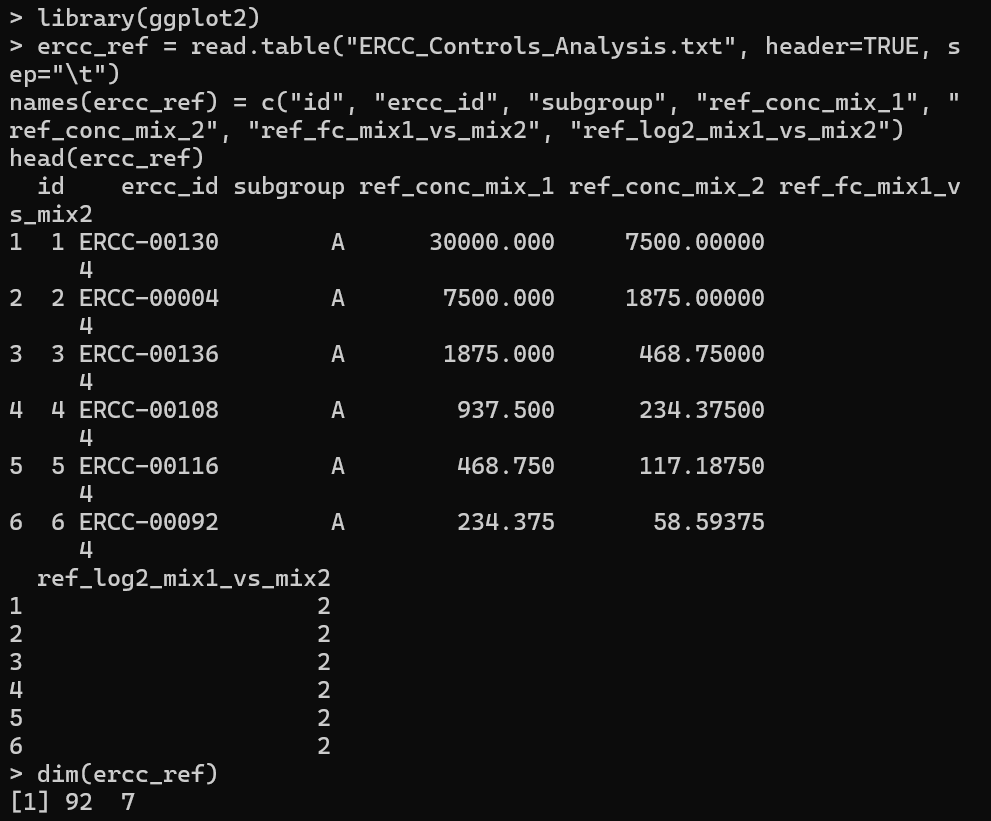

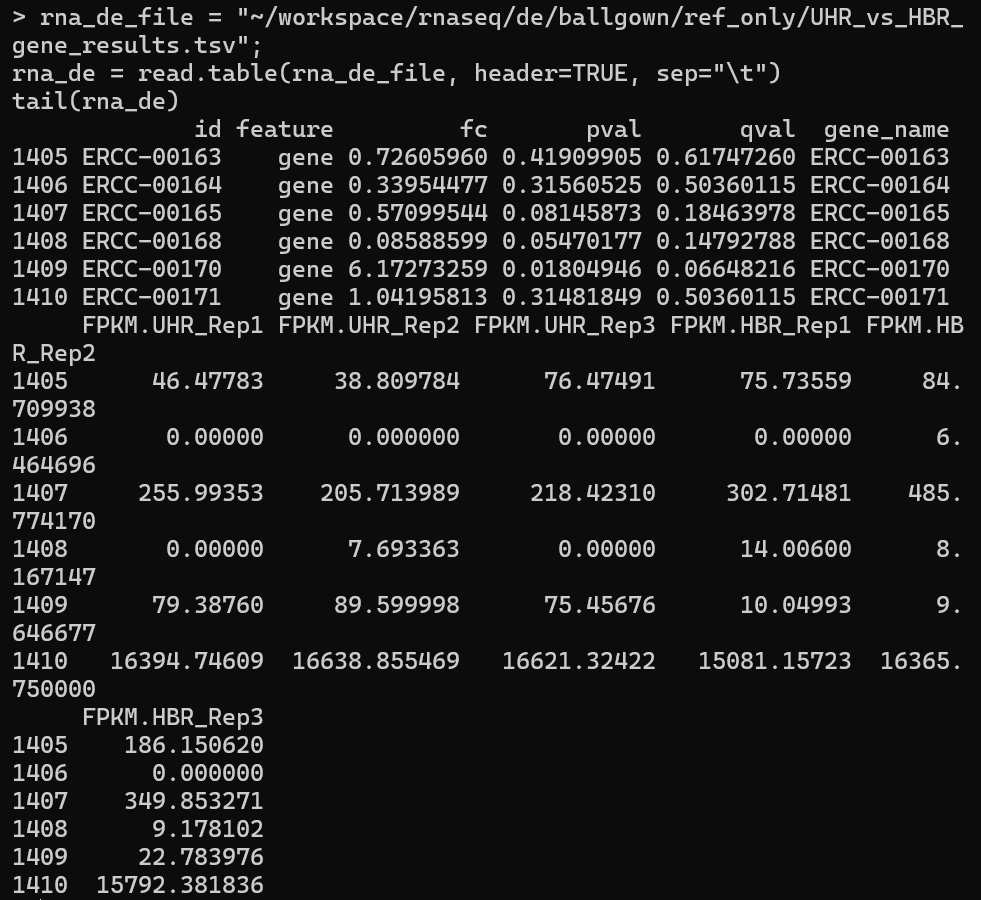

**View the results here:**

http://YOUR_PUBLIC_IPv4_ADDRESS/rnaseq/de/ercc_spikein_analysis/ERCC_Ballgown-DE_vs_SpikeInDE.pdf

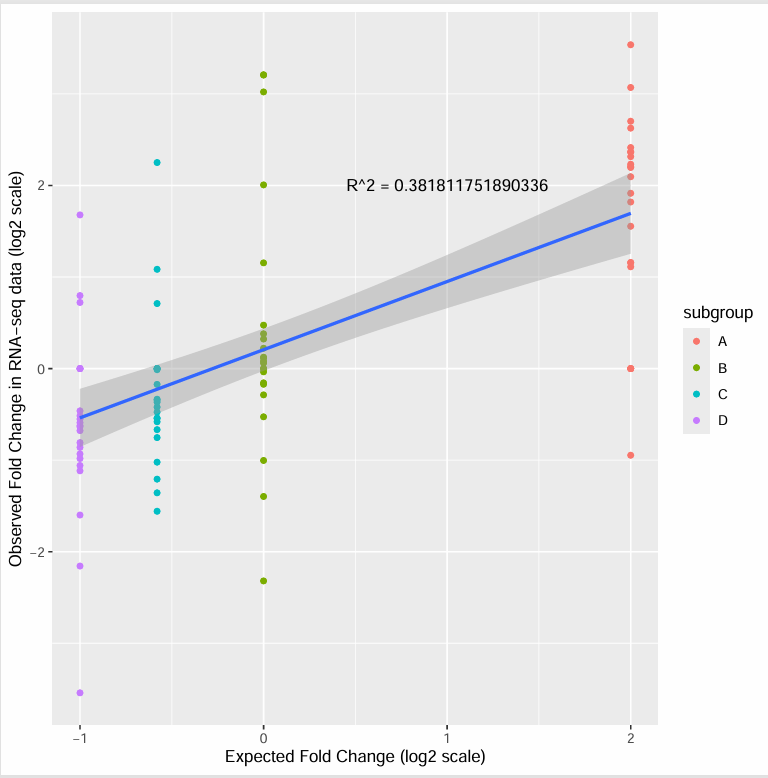

#### 🧭 How to interpret the plot step-by-step (ChatGPT):
1. Axes meaning
- X-axis: Expected log₂ fold changes — what you should observe, ie. -1, -0.58, 0, 2 (based on ERCC spike-in ratios).
- Y-axis: Observed log₂ fold changes from your RNA-seq analysis (via StringTie/Ballgown).

These values come from FPKM, so they already incorporate transcript length and library size normalization — but FPKM can be noisy, especially at low expression levels.

2. The ideal scenario/In a perfect RNA-seq experiment:
- All points would lie on the blue regression line.
- R² would be close to 1.0 — meaning observed values match expected very well.
- Each expected value (like -1, -0.58, 0, 2) would have tight vertical clusters of points.

3. What to look for in your plot
| Region to Look At	                         | What It Tells You                                                                                    |
|--------------------------------------------|------------------------------------------------------------------------------------------------------|
| Each vertical group of x values            | Shows how consistent the observed log₂ fold changes are for that expected value.                     |
| The slope and direction of the blue line   | Indicates whether your experiment generally captured the expected trend                              |
| The spread (scatter) of points vertically  | Wide spread means more noise. Especially concerning at x = 0, where observed values should be near 0 |
| Label "R² = 0.38"	                         | Closer to 1 = better                                                                                |

5. Zooming in on potential issues
- At x = 0: These spike-ins should show no change between samples. If you see lots of variability (e.g., from -2.5 to +3), that suggests noise in quantification.
- At x = -1 or 2: These should show consistent up- or down-regulation. If some are way off (e.g., expected 2 but observed 0.5), that suggests bias or poor dynamic range.

#### 🔎 Example insight from your plot:
- Your plot shows visible upward trend (blue line going up) — ✅ good.
- But points are scattered, especially around x = 0 — ❗ suggests FPKM estimates are noisy, particularly for low or unchanged transcripts.

#### 🛠 Suggestions based on using FPKM with Ballgown (ChatGPT):
- FPKM is not ideal for differential expression — consider switching to counts + DESeq2/edgeR, or TPM + sleuth, for better performance.
- ERCC-based QC is helpful — but interpreting it in the context of FPKM adds another layer of uncertainty.